In [234]:
import create_n_crop_bounding_box as c
import matplotlib.pyplot as plt
import skimage.util as util
import skimage.io as io
import numpy as np
import os as os 
import skimage.color as cl
import skimage.filters as filt 
import scipy.ndimage.filters as fil
import skimage.morphology as morph
import skimage.segmentation as seg
from collections import Counter
import skimage.measure as measure
from skimage import data, exposure, img_as_float

In [370]:
plt.rcParams['image.cmap'] = 'gray'
 
def segment_clump_otsu(I):
    '''
    Segment a leaf image.
    :param I: Color leaf image to segment.
    :return: Logical image where True pixels represent foreground (i.e. leaf pixels).
    '''

    hsv_image = cl.rgb2hsv(I)
    #hsv_image = filt.gaussian(hsv_image,sigma=2.5)
    segmented_image = np.zeros((hsv_image.shape[0],hsv_image.shape[1]))
    segmented_image = np.logical_and(hsv_image[:,:,0]>=0.19, hsv_image[:,:,0]<=0.37)
    segmented_image=segmented_image.astype(bool)
    
    segmented_image = morph.binary_opening(segmented_image,selem = morph.square(4))
    segmented_image = morph.binary_closing(segmented_image,selem = morph.square(3))
    segmented_image = morph.remove_small_objects(segmented_image,min_size=1500)
    
    labeled_image = measure.label(segmented_image,neighbors=8)
    return segmented_image,np.amax(labeled_image)


def color_test(I,lower_ts,higher_ts):
    grayscaled_image= cl.rgb2gray(I)
    segmented_image = np.zeros((grayscaled_image.shape[0],grayscaled_image.shape[1]), dtype=bool)
    for i in range(0,grayscaled_image.shape[0]):
        for j in range(0,grayscaled_image.shape[1]):
            if(grayscaled_image[i,j]>=lower_ts and grayscaled_image[i,j]<=higher_ts):
                segmented_image[i,j]=True
    return segmented_image

D:\Anaconda_Installed\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


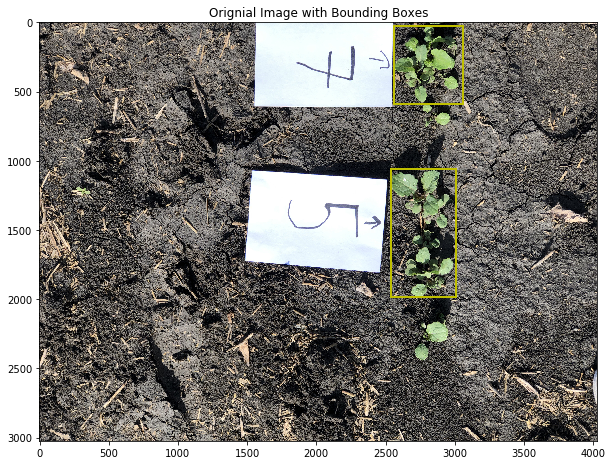

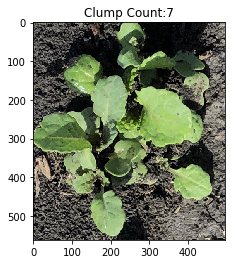

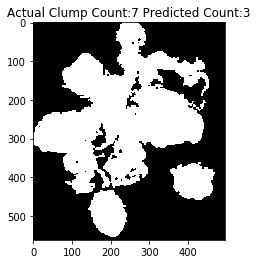

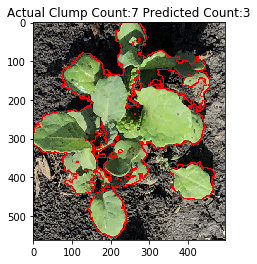

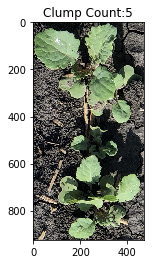

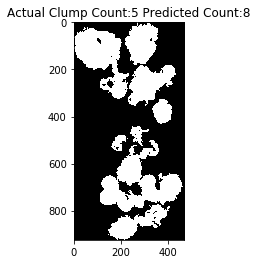

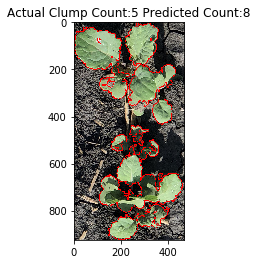

In [371]:
#cropped_images,image_labels = c.cropped_bounding_boxes('Umair','IMG_4456.JPG')
cropped_images,image_labels = c.cropped_bounding_boxes('Umair','IMG_4436.JPG')
#cropped_images,image_labels = c.cropped_bounding_boxes('Umair','IMG_4430.JPG')
for x in range(0,len(image_labels)):
    plt.figure()
    plt.title("Clump Count:"+str(image_labels[x]))
    plt.imshow(cropped_images[x])
    plt.figure()
    segmented_image,predicted_count = segment_clump_otsu(cropped_images[x])
    plt.title("Actual Clump Count:"+str(image_labels[x])+" Predicted Count:"+str(predicted_count))
    plt.imshow(segmented_image)
    plt.figure()
    plt.title("Actual Clump Count:"+str(image_labels[x])+" Predicted Count:"+str(predicted_count))
    plt.imshow(seg.mark_boundaries(cropped_images[x],segmented_image,color=(1,0,0),outline_color=(1,0,0)))
#plt.imshow(color_test(cropped_images[0],0.35,0.55))
#print(cropped_images[0][150:151,:,])

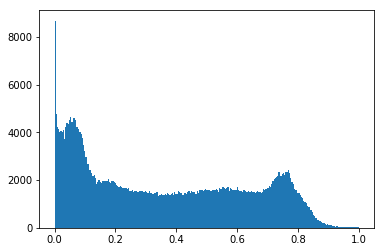

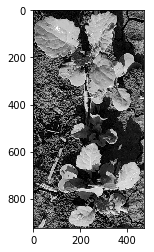

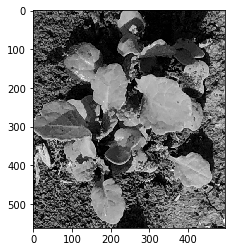

In [356]:
grey_scaled = cl.rgb2gray(cropped_images[1])
plt.hist((grey_scaled).ravel(),bins=257,range=(0,1))
plt.show()
plt.figure()
plt.imshow(grey_scaled)
#print(grey_scaled[:10,:])
plt.figure()
plt.imshow(cropped_images[0][:,:,0])